In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

# Import and print the dataset

In [3]:
df=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

In [8]:
df.drop(['CustomerID','Gender','Age'],axis=1,inplace=True)

In [9]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
print('Annual Income',df['Annual Income (k$)'].unique())
print('Spending Score',df['Spending Score (1-100)'].unique())

Annual Income [ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
Spending Score [39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

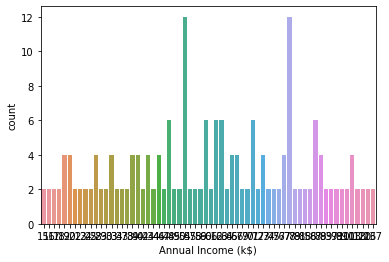

In [11]:
sns.countplot(data=df, x='Annual Income (k$)')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

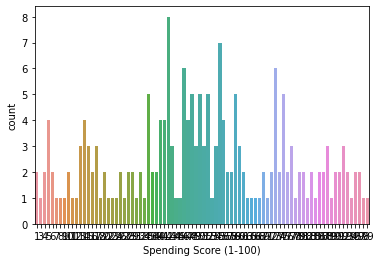

In [12]:
sns.countplot(data=df, x='Spending Score (1-100)')

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.corr()


,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


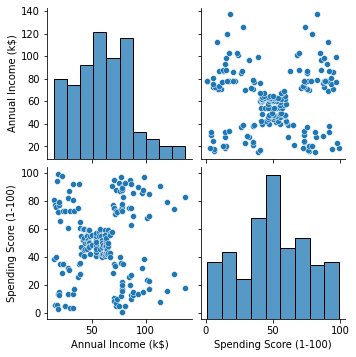

In [15]:
sns.pairplot(data=df)

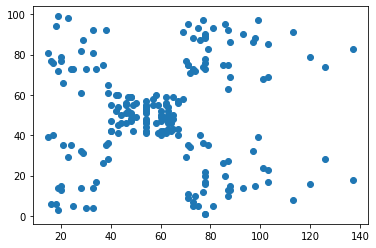

In [16]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

# Normalization Data

In [17]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [18]:
scaler_train=scaler.transform(df)

# DBSCAN Clustering

In [19]:
from sklearn.metrics import v_measure_score
from sklearn.cluster import DBSCAN

labels:  [-1  0  1  2  3]
Estimated no. of clusters: 4
Estimated no. of noise points: 44


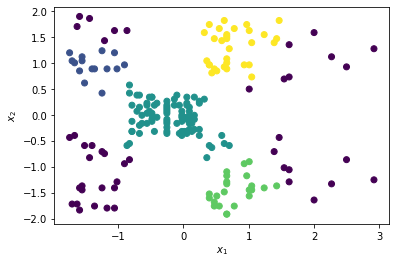

In [26]:
dbscan_cluster = DBSCAN(eps=0.5,min_samples=15)
dbscan_cluster.fit(scaler_train)
print('labels: ',np.unique(dbscan_cluster.labels_))
# Visualizing DBSCAN
plt.scatter(scaler_train[:, 0], 
scaler_train[:, 1], 
c=dbscan_cluster.labels_, 
label=scaler_train)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)



In [23]:
from sklearn.metrics import silhouette_score
print('score: ',silhouette_score(scaler_train,dbscan_cluster.labels_))

score:  0.3687238785666543
